In [1]:
%run ./Model.ipynb

✅ 当前设备：cuda
✅ 数据集加载完成，共 10 类


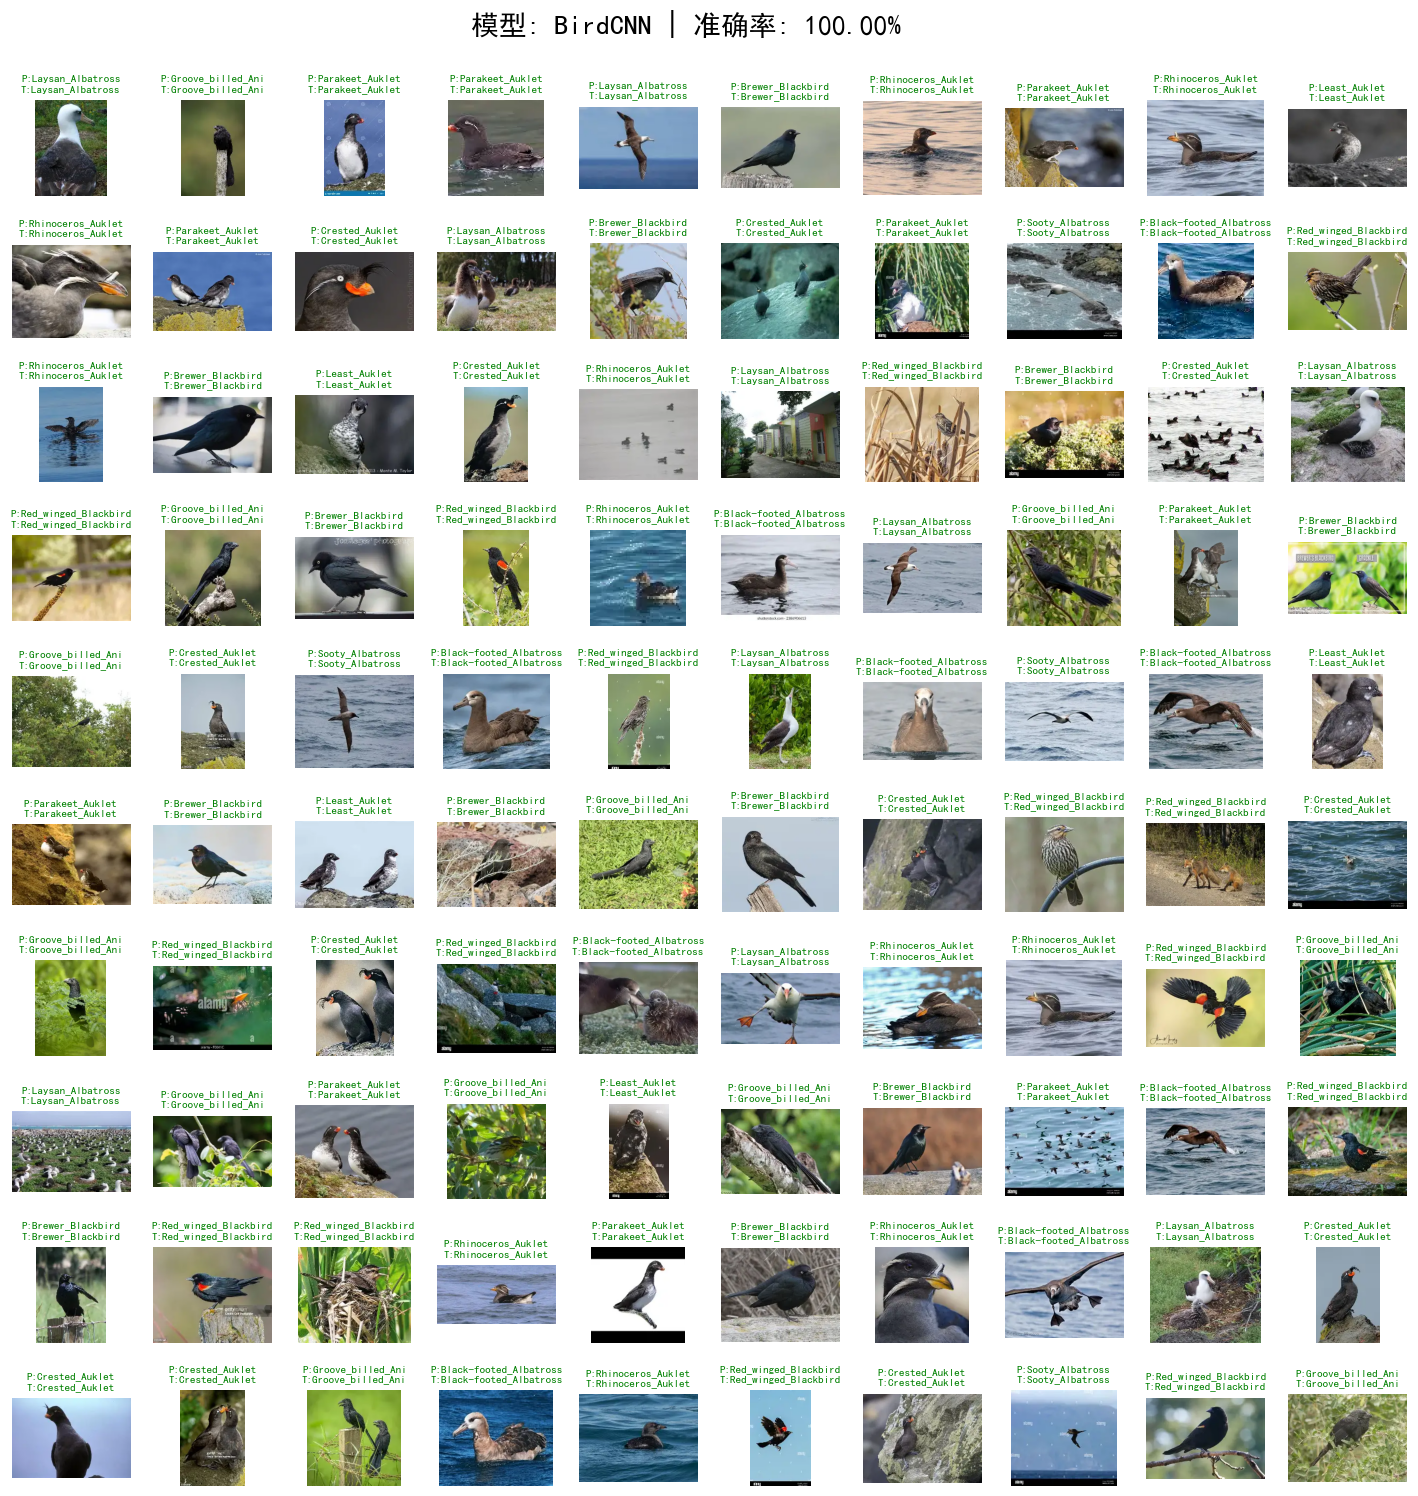

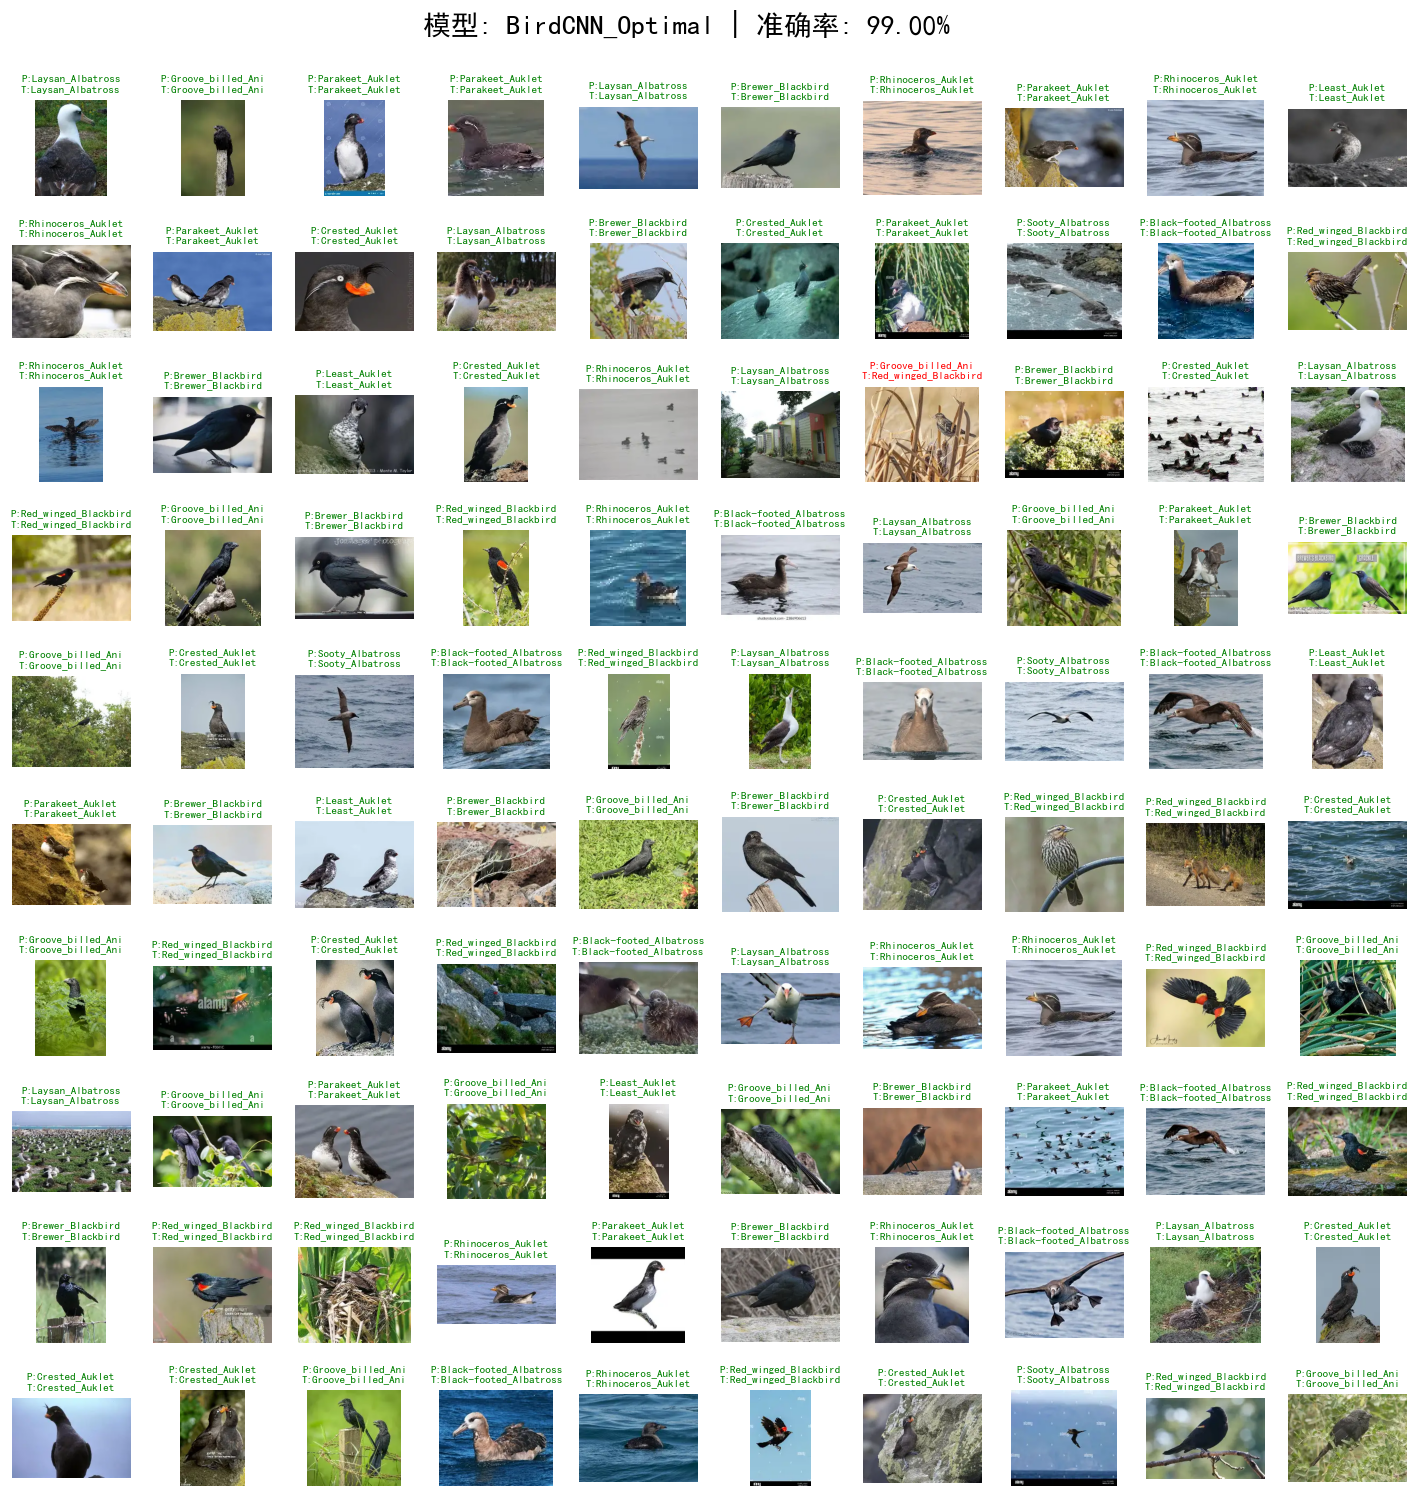

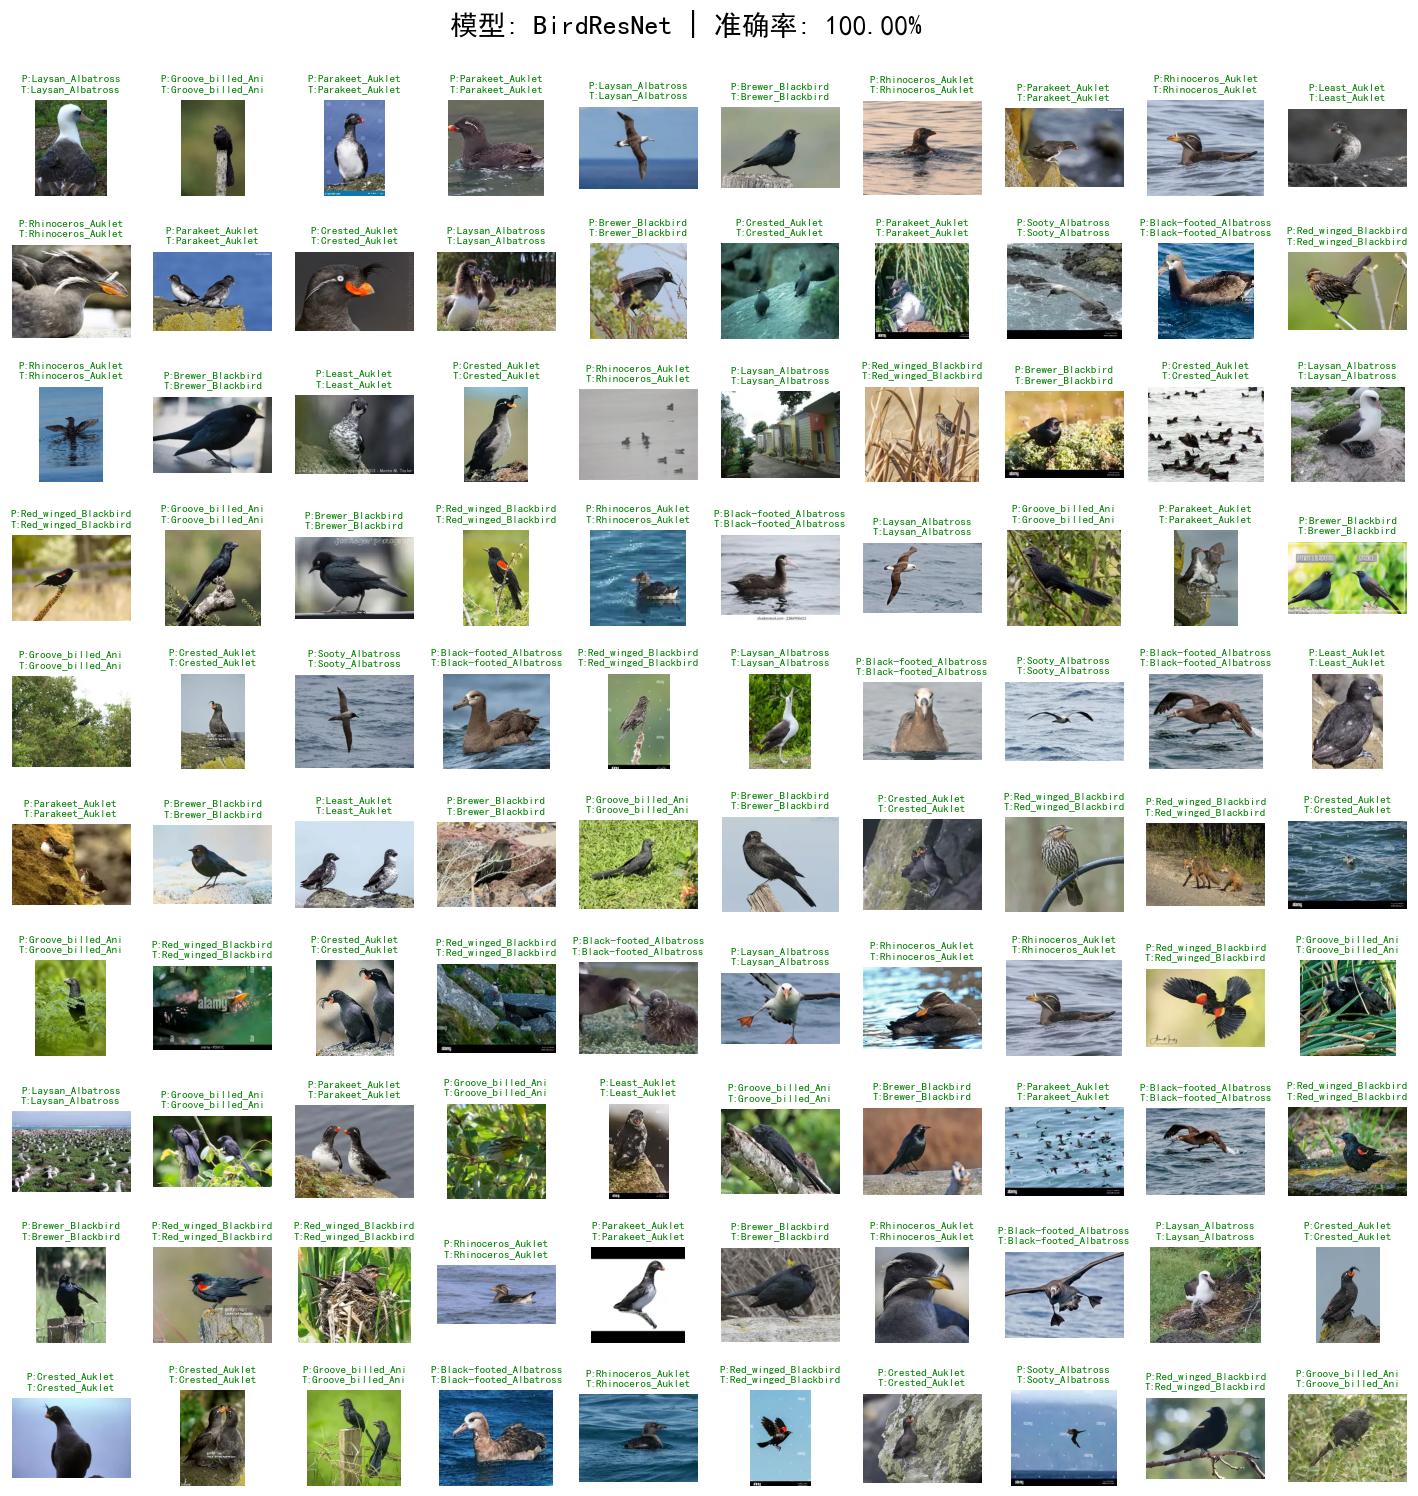

In [2]:
models_info = {
    "BirdCNN": ("BirdCNN_best.pth", BirdCNN(num_classes=num_classes)),
    "BirdCNN_Optimal": ("BirdCNN_Optimal_best.pth", BirdCNN_Optimal(num_classes=num_classes)),
    "BirdResNet": ("BirdResNet_best.pth", BirdResNet(num_classes=num_classes)),
}

# === 数据增强（保持一致）===
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# === 从测试集中随机抽样 100 张 ===
samples = random.sample(range(len(test_loader.dataset)), 100)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def visualize_predictions(model, model_name, model_path):
    """单模型可视化函数"""
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()

    correct = 0
    total = len(samples)

    plt.figure(figsize=(18, 18))
    plt.suptitle(f"模型 {model_name} 预测可视化（100张随机测试样本）", fontsize=20, weight='bold')

    for idx, i in enumerate(samples):
        img_path, label = test_loader.dataset.samples[i]
        image = Image.open(img_path).convert("RGB")
        img_tensor = transform(image).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(img_tensor)
            pred = output.argmax(dim=1).item()

        is_correct = (pred == label)
        correct += int(is_correct)

        # 恢复可视化图像
        img_vis = np.array(image)
        plt.subplot(10, 10, idx + 1)
        plt.imshow(img_vis)
        plt.axis("off")

        title_color = "green" if is_correct else "red"
        plt.title(f"P:{class_names[pred]}\nT:{class_names[label]}", fontsize=8, color=title_color)

    acc = correct / total * 100
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.suptitle(f"模型: {model_name} | 准确率: {acc:.2f}%", fontsize=20, weight='bold', y=0.93)
    plt.show()


# === 遍历可视化每个模型 ===
for model_name, (path, model) in models_info.items():
    visualize_predictions(model, model_name, path)